In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [2]:
res = requests.get('https://namu.wiki/w/%EB%9F%B0%EB%8B%9D%EB%A7%A8/2019%EB%85%84')
soup = bs(res.content, 'html.parser')

# 원하는 정보가 있는 부분 찾아내기 (눈으로 찾음)
# tr:nth-child(2) 여기서 마지막 괄호의 숫자만 2 ~ 52 로 바뀌는 것 확인
soup.select('#app > div > div:nth-child(2) > article > div:nth-child(5) > div:nth-child(2) > div > div > div:nth-child(9) > div.wiki-table-wrap > table > tbody > tr:nth-child(2)')

[<tr><td data-dark-style="background-color:#BD9700;" style="background-color:#FFDA41; text-align:center;"><div class="wiki-paragraph">433회</div></td><td style="text-align:center;"><div class="wiki-paragraph">01.06</div></td><td style="text-align:center;"><div class="wiki-paragraph">7.3%</div></td><td style="text-align:left;"><div class="wiki-paragraph">8.2%</div></td></tr>]

In [16]:
# 우진님 지난 과제 참고
d = {'회차':[], '방영일':[], '닐슨':[], 'TNMS':[]}
d

{'회차': [], '방영일': [], '닐슨': [], 'TNMS': []}

In [17]:
# 두 가지 방법 중에 고민
# 자식에 뭐가 있지 않을까... div *4 니까.
# 내가 할 수 있는 '순서'를 컨트롤 하는 방법은 "리스트"

for i in range(2,53):
    a = '#app > div > div:nth-child(2) > article > div:nth-child(5) > div:nth-child(2) > div > div > div:nth-child(9) > div.wiki-table-wrap > table > tbody > tr:nth-child(%d)' % i
    run_man = soup.select(a)
    # 여기까지 하면 53줄이 나온다.
    # 이때까지는 for문 중첩하는 거의 기능을 완전히 몰라서 고민했는데, for문 기능을 알고 바로 해결!
    # 밖에서 한 줄 돌고 아래 다 돌고, 그 다음 한 줄 돌고 아래 다 돌고!

    episode=[]
    for div in run_man[0].find_all('div'):
        episode.append(div.text)
        # 결과: ['433회', '01.06', '7.3%', '8.2%'] ...

    d['회차'].append(episode[0])
    d['방영일'].append(episode[1])
    d['닐슨'].append(episode[2])
    d['TNMS'].append(episode[3])

df = pd.DataFrame(data=d)
df

,회차,방영일,닐슨,TNMS
0,433회,01.06,7.3%,8.2%
1,434회,01.13,6.4%,7.2%
2,435회,01.20,7.3%,6.9%
3,436회,01.27,6.0%,7.6%
4,437회,02.03,6.2%,7.1%
5,438회,02.10,7.8%,8.0%
6,439회,02.17,6.7%,7.9%
7,440회,02.24,6.5%,7.1%
8,441회,03.03,6.5%,6.4%
9,442회,03.10,6.7%,6.9%


## 시각화

를 위한 전처리

In [23]:
nd = {'회차':[], '방영일':[], '닐슨':[], 'TNMS':[]}
nd

{'회차': [], '방영일': [], '닐슨': [], 'TNMS': []}

In [19]:
for j1 in d['회차']:
    j1 = j1.replace("%", "")
    nd['회차'].append(j1)

from datetime import datetime

for j2 in d['방영일']:
    #j2_1 = datetime.strptime(j2, '%m.%d')
    #j2_2 = j2_1.strftime('%m-%d')
    nd['방영일'].append(j2)

for j3 in d['닐슨']:
    j3 = j3.replace("%", "")
    nd['닐슨'].append(j3)

for j4 in d['TNMS']:
    j4 = j4.replace("%", "")
    nd['TNMS'].append(j4)

df_n = pd.DataFrame(data=nd)
df_n

,회차,방영일,닐슨,TNMS
0,433회,01.06,7.3,8.2
1,434회,01.13,6.4,7.2
2,435회,01.20,7.3,6.9
3,436회,01.27,6.0,7.6
4,437회,02.03,6.2,7.1
5,438회,02.10,7.8,8.0
6,439회,02.17,6.7,7.9
7,440회,02.24,6.5,7.1
8,441회,03.03,6.5,6.4
9,442회,03.10,6.7,6.9


In [20]:
# 오타 고쳐주기
df_n['TNMS'].loc[47] = df_n['TNMS'].loc[47].replace(',', '.')

# 데이터타입 변경하기
df_n['닐슨'] = df_n['닐슨'].astype(float)
df_n['TNMS'] = df_n['TNMS'].astype(float)

# 인덱스
df_n = df_n.set_index('방영일')

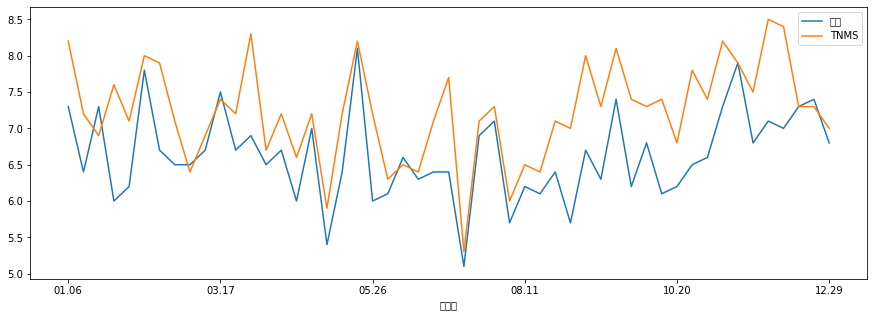

In [22]:
import matplotlib.pyplot as plt
plt.rc("axes", unicode_minus=False)

df_n.plot(figsize=(15,5))

In [24]:
for j1 in d['회차']:
    j1 = j1.replace("%", "")
    nd['회차'].append(j1)

from datetime import datetime

for j2 in d['방영일']:
    j2_1 = datetime.strptime(j2, '%m.%d')
    j2_2 = j2_1.strftime('%m-%d')
    nd['방영일'].append(j2_2)

for j3 in d['닐슨']:
    j3 = j3.replace("%", "")
    nd['닐슨'].append(j3)

for j4 in d['TNMS']:
    j4 = j4.replace("%", "")
    nd['TNMS'].append(j4)

df_n = pd.DataFrame(data=nd)
df_n

,회차,방영일,닐슨,TNMS
0,433회,01-06,7.3,8.2
1,434회,01-13,6.4,7.2
2,435회,01-20,7.3,6.9
3,436회,01-27,6.0,7.6
4,437회,02-03,6.2,7.1
5,438회,02-10,7.8,8.0
6,439회,02-17,6.7,7.9
7,440회,02-24,6.5,7.1
8,441회,03-03,6.5,6.4
9,442회,03-10,6.7,6.9


In [25]:
# 오타 고쳐주기
df_n['TNMS'].loc[47] = df_n['TNMS'].loc[47].replace(',', '.')

# 데이터타입 변경하기
df_n['닐슨'] = df_n['닐슨'].astype(float)
df_n['TNMS'] = df_n['TNMS'].astype(float)

# 인덱스
df_n = df_n.set_index('방영일')

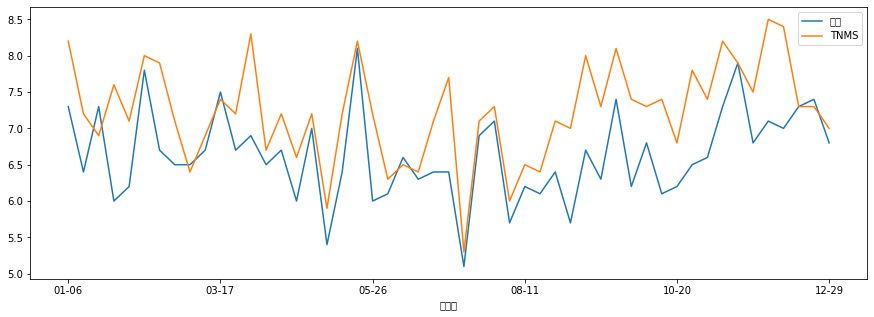

In [26]:
import matplotlib.pyplot as plt
plt.rc("axes", unicode_minus=False)

df_n.plot(figsize=(15,5))

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

res = requests.get('https://namu.wiki/w/%EB%9F%B0%EB%8B%9D%EB%A7%A8/2019%EB%85%84')
soup = bs(res.content, 'html.parser')

# 원하는 정보가 있는 부분 찾아내기 (눈으로 찾음)
# tr:nth-child(2) 여기서 마지막 괄호의 숫자만 2 ~ 52 로 바뀌는 것 확인
# 그 하위 div에 순차적으로 필요한 4가지 정보가 있음을 확인
soup.select('#app > div > div:nth-child(2) > article > div:nth-child(5) > div:nth-child(2) > div > div > div:nth-child(9) > div.wiki-table-wrap > table > tbody > tr:nth-child(2)')

# 데이터프레임 만들기 위해 미리 틀 짜놓기
d = {'회차':[], '방영일':[], '닐슨':[], 'TNMS':[]}

for i in range(2,53):
    a = '#app > div > div:nth-child(2) > article > div:nth-child(5) > div:nth-child(2) > div > div > div:nth-child(9) > div.wiki-table-wrap > table > tbody > tr:nth-child(%d)' % i
    run_man = soup.select(a)
    # 결과: tr:nth-child(숫자)만 바뀌어서 53개 출력

    episode=[]
    for div in run_man[0].find_all('div'):
        episode.append(div.text)
        # 결과: ['433회', '01.06', '7.3%', '8.2%']
        #       ['434회', '01.07', 'x.x%', 'x.x%'] -- 53개 출력

    d['회차'].append(episode[0])
    d['방영일'].append(episode[1])
    d['닐슨'].append(episode[2])
    d['TNMS'].append(episode[3])
    # 결과: ['433회', '433회', ..], ['01.06', '01.06', ..], ['7.3%', '7.3%', ..], ['8.2%', '8.2%', ..]

# for문이 중첩되면, 밖에서 한 줄 돌고 아래 다 돌고, 그 다음 밖에서 그 다음 한 줄 돌고 아래 다 돌고, 이렇게 반복 됨
# ~tr:nth-child(2) -> 그 아래 div 4개 ['433회', '01.06', '7.3%', '8.2%'] 출력 --> 각각 d['회차'], d['방영일']..에 순서대로 추가 --> ~tr:nth-child(3) ->  ['434회', '01.07', 'x.x%', 'x.x%'] 출력 -> 각각 d['회차'], d['방영일']..에 순서대로 추가 --> ~tr:nth-child(4) ... (53)까지 반복!
   
df = pd.DataFrame(data=d)
df

In [ ]:
# 그대로 짚어넣음
for j1 in d['회차']:
    nd['회차'].append(j1)

from datetime import datetime

for j2 in d['방영일']:
    # 아래 두 줄 넣어도 모양만 바뀌고 str 그대로라서 할 필요 없음.
    #j2_1 = datetime.strptime(j2, '%m.%d')
    #j2_2 = j2_1.strftime('%m-%d')
    nd['방영일'].append(j2)

# 숫자로 바꾸기 위해 % 제거
for j3 in d['닐슨']:
    j3 = j3.replace("%", "")
    nd['닐슨'].append(j3)

for j4 in d['TNMS']:
    j4 = j4.replace("%", "")
    nd['TNMS'].append(j4)

df_n = pd.DataFrame(data=nd)
df_n

# 오타 고쳐주기
df_n['TNMS'].loc[47] = df_n['TNMS'].loc[47].replace(',', '.')

# 데이터타입 변경하기
df_n['닐슨'] = df_n['닐슨'].astype(float)
df_n['TNMS'] = df_n['TNMS'].astype(float)

# x축에 들어가게 할 '방영일'을 인덱스로 지정
df_n = df_n.set_index('방영일')

In [ ]:
import matplotlib.pyplot as plt
plt.rc("axes", unicode_minus=False)

df_n.plot(figsize=(15,5))